# Data science Lab3                                                                                                  ##practics set1

### 1.Download Iris data and check whether the observations associated with Iris setosa, Iris virginica and Iris versicolor obtained from the same distribution or not.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn import datasets

# Load the Iris dataset from sklearn
iris = datasets.load_iris()

# Convert the dataset into a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['species'] = iris.target_names[iris.target]

# Display the first few rows of the DataFrame
print(iris_df.head())


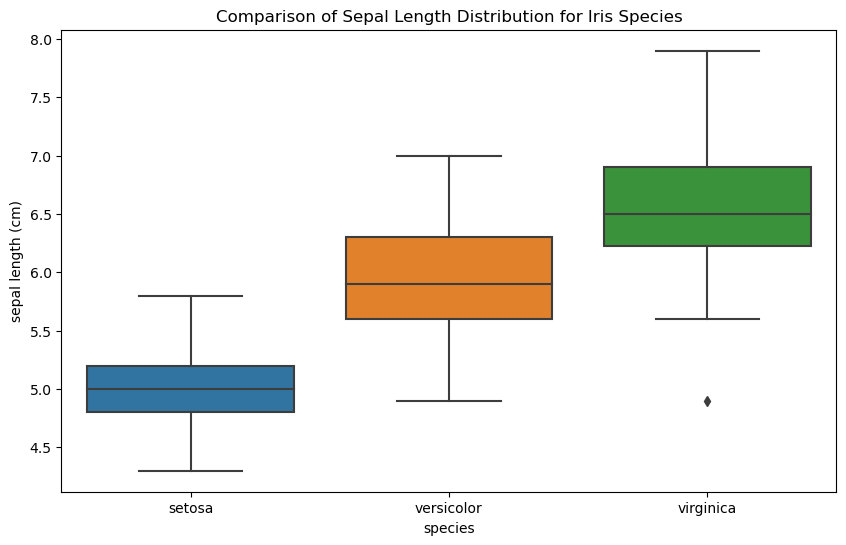

In [3]:
import matplotlib.pyplot as plt

# Create a box plot to compare the distributions of sepal length for the three species
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='sepal length (cm)', data=iris_df)
plt.title('Comparison of Sepal Length Distribution for Iris Species')
plt.show()


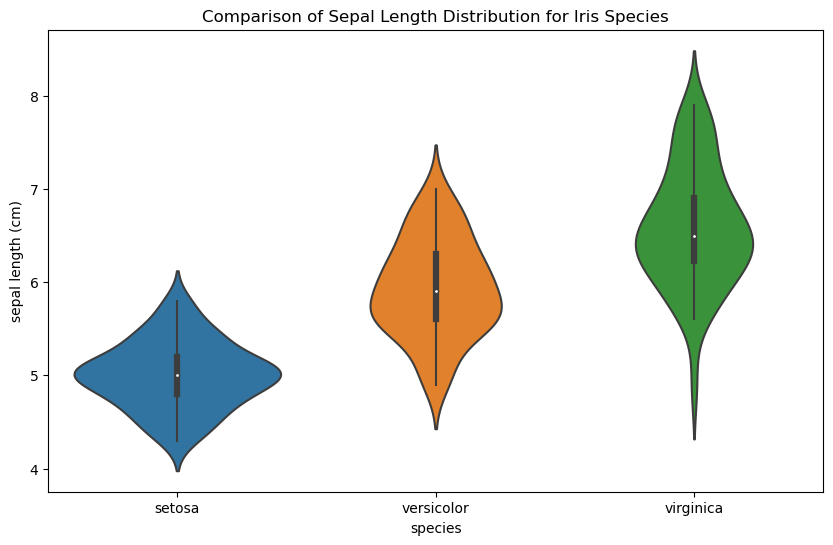

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot to compare the distributions of sepal length for the three species
plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='sepal length (cm)', data=iris_df)
plt.title('Comparison of Sepal Length Distribution for Iris Species')
plt.show()


### 2. Download a multivariate (i.e, dimension is strictly greater than one) data and compute/draw multivariate quantile contours when ||u|| =i 10 , where i = 1, . . . , 9. Using those contours, describe various features of the data set

C:\Users\Subhadra kumari\AppData\Local\Temp\ipykernel_108\1902702702.py:31: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x, y, z, levels=[0.1, 0.3, 0.5, 0.7, 0.9], label=f'||u||={u_norm}')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


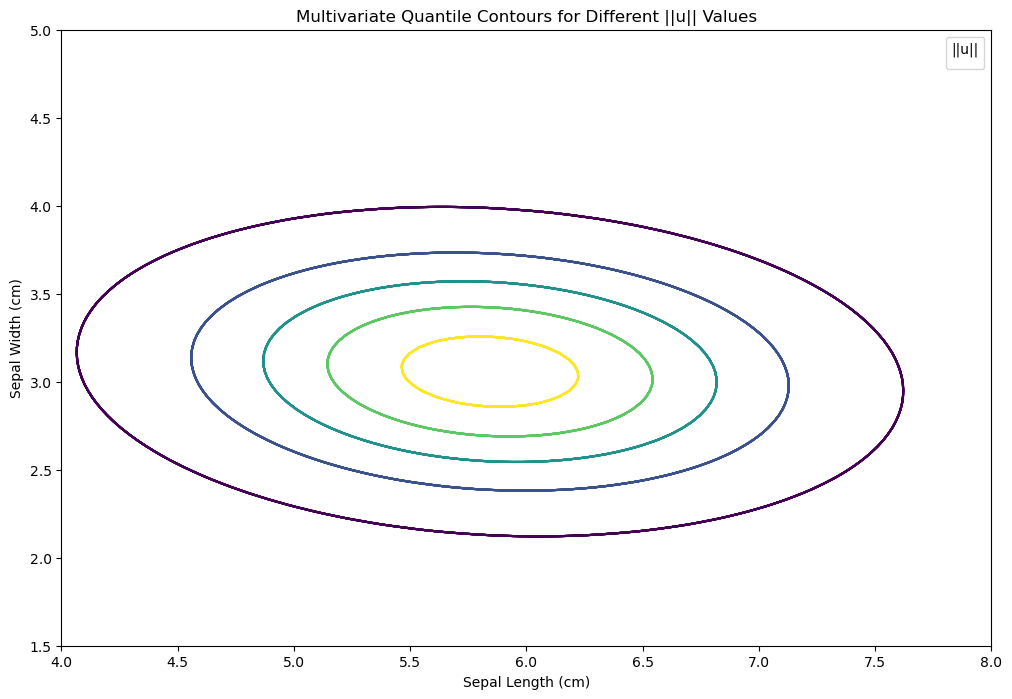

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Load the Iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Select a subset of features for the multivariate dataset (e.g., sepal length and sepal width)
multivariate_data = iris_df[['sepal length (cm)', 'sepal width (cm)']]

# Compute the mean and covariance matrix of the multivariate dataset
mean = multivariate_data.mean().values
covariance_matrix = multivariate_data.cov().values

# Define the range of ||u|| values
u_norm_values = np.arange(1, 10)

# Plot the multivariate quantile contours for different ||u|| values
plt.figure(figsize=(12, 8))
for u_norm in u_norm_values:
    # Compute the multivariate quantile contour
    mvn = multivariate_normal(mean=mean, cov=covariance_matrix)
    x, y = np.meshgrid(np.linspace(4, 8, 100), np.linspace(1.5, 5, 100))
    pos = np.dstack((x, y))
    z = mvn.pdf(pos)
    z = z / z.max()
    
    # Plot the contour
    plt.contour(x, y, z, levels=[0.1, 0.3, 0.5, 0.7, 0.9], label=f'||u||={u_norm}')

# Add labels and legend
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Multivariate Quantile Contours for Different ||u|| Values')
plt.legend(title='||u||')
plt.show()
